# LAB 4: Gram-Schmidt and Eigenvalues & Eigenvectors



In this lab you will use Python to study the following topics:

- The Gram-Schmidt Algorithm to change an independent set of vectors into anorthonormal set.

- Determination of eigenvalues and eigenvectors using the characteristic polynomial of a matrix

- Use of eigenvectors to transform a matrix to diagonal form.


# First: you should run this cell

In [1]:
# Make all numpy available via shorter 'np' prefix
import numpy as np
# Make all sympy available via shorter 'sym' prefix
import sympy as sym

import math


#import plotter
import matplotlib.pyplot as plt


def rvect(m):
    return np.fix((10 * (np.random.rand(m, 1))))


def rmat(m, n):
    return np.fix((10 * (np.random.rand(m, n))))

#  Question 1 : Gram-Schmidt Orthogonalization

#### Generate three random vectors in $R^3$ by

- `u1 = np.array([[4], [9], [6]])`
- `u2 = np.array([[6], [8], [8]])`
- `u3 = np.array([[0], [9], [6]])`

- Check whether they are linearly independent by calculating `np.linalg.matrix_rank(np.block([u1, u2, u3]))`.
- If the answer is not 3, then generate a new random set of vectors and calculate the rank. Repeat until the rank is 3. Now use these vectors in the following calculations.

In [8]:
u1 = np.array([[4],[9],[6]])
u2 = np.array([[6],[8],[8]])
u3 = np.array([[0],[9],[6]])
print("u1 = \n" , u1)
print("---------------")
print("u1 = \n" , u2)
print("---------------")
print("u1 = \n" , u3)
print("---------------")
print("Rank = " , np.linalg.matrix_rank(np.block([u1,u2,u3])))

u1 = 
 [[4]
 [9]
 [6]]
---------------
u1 = 
 [[6]
 [8]
 [8]]
---------------
u1 = 
 [[0]
 [9]
 [6]]
---------------
Rank =  3


In [2]:
#type your code here:



--------u1------------
[[4]
 [9]
 [6]]
---------------------
--------u2------------
[[6]
 [8]
 [8]]
---------------------
--------u3------------
[[0]
 [9]
 [6]]
---------------------
--------rank([u1, u2, u3])------------
3
---------------------


#### Plot the three vectors in the graphics window as red, green, and blue dotted lines by the commands:
- `r = np.arange(0, 1, 0.05)`
- `ax = plt.axes(projection='3d')`
- `ax.plot3D(r * u1[0], r * u1[1], r * u1[2], 'r:')`
- `ax.plot3D(r * u2[0], r * u2[1], r * u2[2], 'g:')`
- `ax.plot3D(r * u3[0], r * u3[1], r * u3[2], 'b:')`

#### Determine visually whether the vectors are mutually orthogonal or not.

### ---------------------------------------------------Write your answer here--------------------------------------------



          ANSWER :
                    NOT ORTHOGONAL



### --------------------------------------------------------------------------------------------------------------------------------

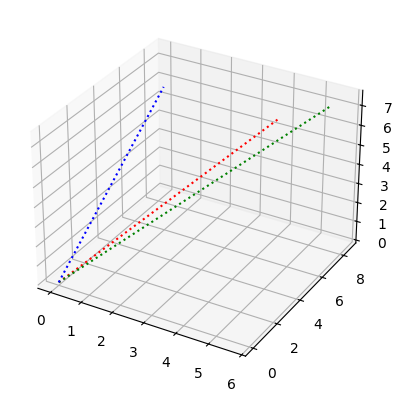

In [88]:
r = np.arange(0,1,0.05)
ax = plt.axes(projection = '3d')
ax.plot3D(r * u1[0] , r * u1[1] , r * u1[2] , 'r:')
ax.plot3D(r * u2[0] , r * u2[1] , r * u2[2] , 'g:')
ax.plot3D(r * u3[0] , r * u3[1] , r * u3[2] , 'b:')


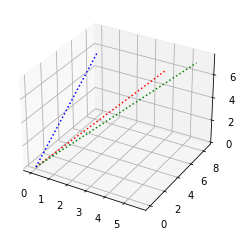

In [3]:
#type your code here


#### (b) Now use the vectors u1, u2, u3 to obtain an orthogonal basis for R3, following the Gram-Schmidt algorithm. Set `v1 = u1`. Obtain v2 by removing the component of u2 in the direction v1:


\\[v_2 = u_2 - \frac{v_1 \cdot u_2}{v_1 \cdot v_1}v_1\\]

- Calculate the dot product to check that the vectors v1 and v2 are mutually orthogonal (within a negligible numerical error). Also add v2 to your graphics window as a dashed-dotted green line.

v1 = 
 [[4]
 [9]
 [6]]
-------------------
v2 = 
 [[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
-------------------
v1 . v2 = 
 [[0.]]
--------------------


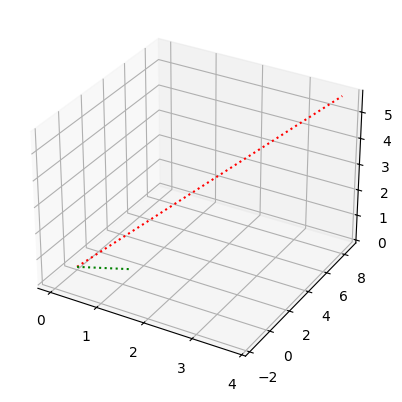

In [27]:
v1 = u1
v2 = u2 - (v1.T@u2 / (v1.T@v1))*v1
print("v1 = \n" , v1)
print("-------------------")
print("v2 = \n" , v2)
print("-------------------")
print("v1 . v2 = \n" , v1.T@v2)
print("--------------------")

r = np.arange(0,1,0.05)
ax = plt.axes(projection = '3d')
ax.plot3D(r * v1[0] , r * v1[1] , r * v1[2] , 'r:')
ax.plot3D(r * v2[0] , r * v2[1] , r * v2[2] , 'g:')

--------v1------------
[[4]
 [9]
 [6]]
---------------------
--------v2------------
[[ 1.66917293]
 [-1.7443609 ]
 [ 1.5037594 ]]
---------------------
--------v1 . v2------------
[[0.]]
---------------------


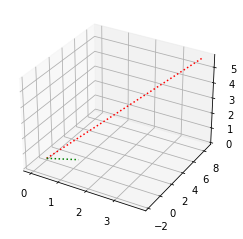

In [4]:
#type your code here


#### Now obtain v3 by removing the components of u3 in the directions of v1 and v2:

\\[v_3 = u_3 - \frac{v_1 \cdot u_3}{v_1 \cdot v_1}v_1 - \frac{v_2 \cdot u_3}{v_2 \cdot v_2}v_2\\\\]
- Calculate dot products by python to check that v3 is orthogonal to the vectors v1 and v2 (within a negligible numerical error). Add v3 to your plot as a dashed-dotted blue line by

In [37]:
v3 = u3 - ((v1.T@ u3) / (v1.T@ v1)) *v1 - ((v2.T@u3) / (v2.T@v2)) *v2
print("v3 = \n" , v3)
print("-------------------")
print("v3.v1 = \n" , v3.T@v1)
print("--------------------")
print("v3.v2 = \n" , v3.T@v2)

v3 = 
 [[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
-------------------
v3.v1 = 
 [[-3.55271368e-15]]
--------------------
v3.v2 = 
 [[0.]]


In [5]:
#type your code here


--------v3------------
[[-2.14126394]
 [-0.35687732]
 [ 1.96282528]]
---------------------
--------v3 . v1------------
[[-1.77635684e-15]]
---------------------
--------v3 . v2------------
[[8.8817842e-16]]
---------------------


#### Add v3 to your plot as a dashed-dotted blue line. Obtain a good alignment of the graph that shows orthogonality in perspective using:
- `ax.view_init(angle1, angle2)`

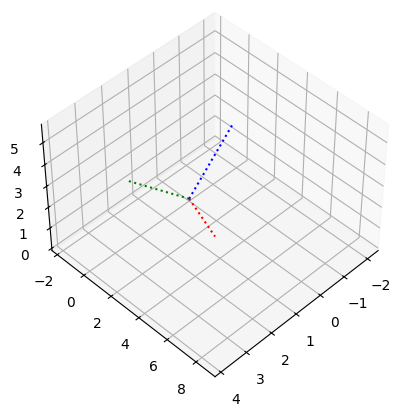

In [42]:
r = np.arange(0,1,0.05)
ax = plt.axes(projection = '3d')
ax.plot3D(r * v1[0] , r * v1[1] , r * v1[2] , 'r:')
ax.plot3D(r * v2[0] , r * v2[1] , r * v2[2] , 'g:')
ax.plot3D(r * v3[0] , r * v3[1] , r * v3[2] , 'b:')
ax.view_init(45,45)


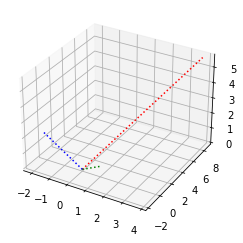

In [6]:
#type your code here


#### (c) The last step in the Gram-Schmidt algorithm is to rescale the vectors v1, v2, v3 to obtain an orthonormal basis for R3:

- `w1 = v1 / np.linalg.norm(v1)`
- `w2 = v2 / np.linalg.norm(v2)`
- `w3 = v3 / np.linalg.norm(v3)`

#### Define the matrix Q = [w1, w2, w3] and give written answers to the following questions.



- What is the inverse matrix Q Now.

In [48]:
w1 = v1 / np.linalg.norm(v1)
w2 = v2 / np.linalg.norm(v2)
w3 = v3 / np.linalg.norm(v3)
print("w1 = \n" , w1)
print("-------------------")
print("w2 = \n" , w2)
print("-------------------")
print("w3 = \n" , w3)
print("-------------------")
Q = np.block([w1,w2,w3])
print("Q = \n" , Q)
print("-------------------")
print("Q.T @ Q \n" , Q.T@Q)
print("-------------------")
print("Transpose of Q = \n" , Q.T)
print("-------------------")
print("Inverse of Q = \n", np.linalg.inv(Q))


w1 = 
 [[0.34684399]
 [0.78039897]
 [0.52026598]]
-------------------
w2 = 
 [[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
-------------------
w3 = 
 [[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
-------------------
Q = 
 [[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
-------------------
Q.T @ Q 
 [[ 1.00000000e+00 -6.78742704e-17 -1.21753635e-16]
 [-6.78742704e-17  1.00000000e+00 -9.67913470e-17]
 [-1.21753635e-16 -9.67913470e-17  1.00000000e+00]]
-------------------
Transpose of Q = 
 [[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
-------------------
Inverse of Q = 
 [[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]


In [7]:
#type your code here:


--------w1------------
[[0.34684399]
 [0.78039897]
 [0.52026598]]
---------------------
--------w2------------
[[ 0.58684177]
 [-0.61327608]
 [ 0.52868628]]
---------------------
--------w3------------
[[-0.73165291]
 [-0.12194215]
 [ 0.67068184]]
---------------------
--------Q------------
[[ 0.34684399  0.58684177 -0.73165291]
 [ 0.78039897 -0.61327608 -0.12194215]
 [ 0.52026598  0.52868628  0.67068184]]
---------------------
--------Q.T @ Q------------
[[ 1.00000000e+00 -6.78742704e-17 -8.48135658e-18]
 [-6.78742704e-17  1.00000000e+00  1.83949226e-16]
 [-8.48135658e-18  1.83949226e-16  1.00000000e+00]]
---------------------
--------inv(Q)------------
[[ 0.34684399  0.78039897  0.52026598]
 [ 0.58684177 -0.61327608  0.52868628]
 [-0.73165291 -0.12194215  0.67068184]]
---------------------


# Question 2. Eigenvectors and Diagonalization

#### (a) Generate a random 3 * 3 integer matrix and test whether its eigenvalues are all real by the commands

- `A = rmat(3,3)`
- Use [numpy.linalg.eig](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to obtain the eigenvalues of `A` as follows:
    - `w, v = np.linalg.eig(A)`. Where `w` are the eigenvalues and `v`the normalized (unit “length”) eigenvectors, such that the column `v[:,i]` is the eigenvector corresponding to the eigenvalue `w[i]`.
- `z = w - w.real`

If any entry in the vector z is not zero, then the eigenvalues of A are not all real. In this case repeat these commands until you get an A for which z has all zeros.

<div class="alert alert-warning">
    <h4>
        If you generated any matrices with complex eigenvalues, be very careful here! don't use it for the next questions!
    </h4>
</div>

In [60]:
A = rmat(3,3)
print("A = \n" , A)
print("-------------------")
w , v = np.linalg.eig(A)
print("w = \n" , w)
print("-------------------")
print("v = \n" , v)
print("-------------------")
z = w - w.real
print("z = \n" , z)


A = 
 [[6. 8. 3.]
 [5. 0. 8.]
 [3. 1. 9.]]
-------------------
w = 
 [14.21651019  4.17221511 -3.3887253 ]
-------------------
v = 
 [[-0.6914285  -0.84897172  0.66374314]
 [-0.52340092 -0.00419091 -0.7411227 ]
 [-0.497974    0.52842166 -0.10090681]]
-------------------
z = 
 [0. 0. 0.]


In [8]:
#type your code here:


------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------w------------------
[16.30136895 -1.78751922  6.48615027]
-------------------------------
------------v------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------z------------------
[0. 0. 0.]
-------------------------------


#### Now calculate the characteristic polynomial p(t) of your matrix A by

- Symbolic computations are done with `Symbol` class in `sympy`. Read the [documentation](https://docs.sympy.org/latest/gotchas.html#introduction) for many different examples.
- `from sympy.abc import t`
- `I = np.eye(3)`
- `p = sym.det(sym.Matrix(A - t * I))`
- `sym.solve(p)`


#### Plot the characteristic polynomial of A in a graphics window

- `p1 = sym.plot(p, (t, -10, 10), show=False)`
- `p1.show()`

- Adjust the horizontal range of the plot (change [ -10,10] if needed).
- View the graph with a range that shows all three real roots, and include the graph in your lab report. Use the graph to obtain approximate values for the three real roots of p(t).


t
P =  -1.0*t**3 + 15.0*t**2 + 3.0*t - 201.0
--------------------------------------------------------
Eigen values =  [-3.38872529950382 - 0.e-22*I, 4.17221511238322 + 0.e-22*I, 14.2165101871206 - 0.e-20*I]


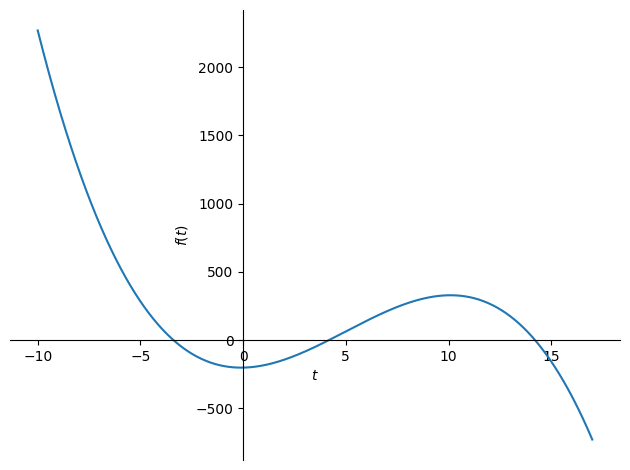

In [ ]:
from sympy.abc import t
I = np.eye(3)
p = sym.det(sym.Matrix(A - t * I))
print("P = " , p)
print("--------------------------------------------------------")
print("Eigen values = ", sym.solve(p))
p1 = sym.plot(p, (t, -10, 17), show=False)
p1.show()

------------p------------------
-1.0*t**3 + 21.0*t**2 - 65.0*t - 189.0
-------------------------------
------------roots------------------
[-1.78751922313492 + 0.e-22*I, 6.48615027225818 + 0.e-19*I, 16.3013689508767 - 0.e-21*I]
-------------------------------


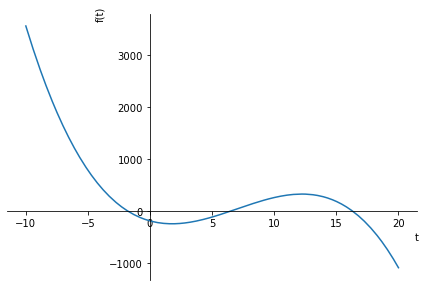

In [9]:
#typr your code here:


#### (b)Use the python to generate a matrix P and a diagonal matrix D. 

- `w, P = np.linalg.eig(A)`
- `D = np.linalg.diag(w)`

- Compare the diagonal entries of D with your graphical estimates for the eigenvalues of A in part (a).

#### Use python to define (the columns of P).

- `p1 = P[:, [0]]`
- `p2 = P[:, [1]]`
- `p3 = P[:, [2]]`
 
#### Calculate

- `A @ p1 - D[0, 0] * p1`
- `A @ p2 - D[1, 1] * p2`
- `A @ p3 - D[2, 2] * p3`

#### What does this calculation tell you about the eigenvalues and eigenvectors of A? 

### ---------------------------------------------------Write your answer here------------------------------------

                           
                           
                                   THIS CONFIRM THAT : 
                                                        A * EIGEN VECTOR - EIGEN VALUE * EIGEN VECTOR = 0 



### ------------------------------------------------------------------------------------------------------------------------

In [79]:
w , P = np.linalg.eig(A)
D = np.diag(w)
print("P(Eigen vector) = \n" , P)
print("------------------------------------")
print("w(Eigen values) = \n" , w)
print("------------------------------------")
print("D = \n" , D)
print("------------------------------------")
p1 = P[:, [0]]
p2 = P[:, [1]]
p3 = P[:, [2]]
print("A @ p1 - D[0, 0] * p1 = \n" , A @ p1 - D[0, 0] * p1)
print("------------------------------------")
print("A @ p2 - D[1, 1] * p2 = \n" , A @ p2 - D[1, 1] * p2)
print("------------------------------------")
print("A @ p3 - D[2, 2] * p3 = \n" , A @ p3 - D[2, 2] * p3)

P(Eigen vector) = 
 [[-0.6914285  -0.84897172  0.66374314]
 [-0.52340092 -0.00419091 -0.7411227 ]
 [-0.497974    0.52842166 -0.10090681]]
------------------------------------
w(Eigen values) = 
 [14.21651019  4.17221511 -3.3887253 ]
------------------------------------
D = 
 [[14.21651019  0.          0.        ]
 [ 0.          4.17221511  0.        ]
 [ 0.          0.         -3.3887253 ]]
------------------------------------
A @ p1 - D[0, 0] * p1 = 
 [[5.32907052e-15]
 [4.44089210e-15]
 [5.32907052e-15]]
------------------------------------
A @ p2 - D[1, 1] * p2 = 
 [[2.66453526e-15]
 [3.27515792e-15]
 [8.88178420e-16]]
------------------------------------
A @ p3 - D[2, 2] * p3 = 
 [[-4.88498131e-15]
 [ 8.88178420e-16]
 [-1.11022302e-16]]


In [10]:
#type your code here:


------------P------------------
[[-0.51414231 -0.82693079 -0.2844389 ]
 [-0.8373378   0.50193728 -0.7754785 ]
 [-0.18580392  0.25346488  0.56367331]]
-------------------------------
------------D------------------
[[16.30136895  0.          0.        ]
 [ 0.         -1.78751922  0.        ]
 [ 0.          0.          6.48615027]]
-------------------------------
------------A @ p1 - D[0, 0] * p1------------------
[[ 5.32907052e-15]
 [-5.32907052e-15]
 [-1.77635684e-15]]
---------------------------------------------------
------------A @ p2 - D[1, 1] * p2------------------
[[2.22044605e-16]
 [3.66373598e-15]
 [1.11022302e-15]]
---------------------------------------------------
------------A @ p3 - D[2, 2] * p3------------------
[[ 2.66453526e-15]
 [-4.44089210e-15]
 [-1.77635684e-15]]
---------------------------------------------------


#### (c) Let A, P, D be as in part (b).

- Verify by python that `A = P @ D @ np.linalg.inv(P)`.
- Use this formula for A to express A<sup>5</sup> and A<sup>10</sup> symbolically in terms of P, P<sup>-1</sup>, D<sup>5</sup> and D<sup>10</sup>.
- Verify your answer to this question numerically using python. Hint: use `np.linalg.matrix_power(A, 5)` to calculate A<sup>5</sup>.

### ---------------------------------------------------Write your answer here------------------------------------



                                        THEN , 
                                                A   =   P @ D @ np.linalg.inv(P)



### ------------------------------------------------------------------------------------------------------------------------

In [85]:

print("A = \n" , A)
print("------------------------------------")
print("P @ D @ np.linalg.inv(P) = \n" , P @ D @ np.linalg.inv(P))
print("------------------------------------")
print("-------------------------------------------------------------------------------------------")
print("A**5 = \n" , np.linalg.matrix_power(A,5))
print("------------------------------------")
print("P @ D**5 @ np.linalg.inv(P) = \n" , P @ np.linalg.matrix_power(D,5) @ np.linalg.inv(P))
print("-------------------------------------------------------------------------------------------")
print("A**10 = \n" , np.linalg.matrix_power(A,10))
print("------------------------------------")
print("P @ D**10 @ np.linalg.inv(P) = \n" , P @ np.linalg.matrix_power(D,10) @ np.linalg.inv(P))



A = 
 [[6. 8. 3.]
 [5. 0. 8.]
 [3. 1. 9.]]
------------------------------------
P @ D @ np.linalg.inv(P) = 
 [[6.00000000e+00 8.00000000e+00 3.00000000e+00]
 [5.00000000e+00 4.74724304e-15 8.00000000e+00]
 [3.00000000e+00 1.00000000e+00 9.00000000e+00]]
------------------------------------
-------------------------------------------------------------------------------------------
A**5 = 
 [[217626. 147816. 348783.]
 [164601. 110844. 265320.]
 [156207. 105381. 253065.]]
------------------------------------
P @ D**5 @ np.linalg.inv(P) = 
 [[217626. 147816. 348783.]
 [164601. 110844. 265320.]
 [156207. 105381. 253065.]]
-------------------------------------------------------------------------------------------
A**10 = 
 [[1.26174083e+11 8.53082228e+10 2.03387560e+11]
 [9.55113317e+10 6.45767407e+10 1.53962366e+11]
 [9.08710470e+10 6.14389882e+10 1.46483927e+11]]
------------------------------------
P @ D**10 @ np.linalg.inv(P) = 
 [[1.26174083e+11 8.53082228e+10 2.03387560e+11]
 [9.551133

In [11]:
#type your code here:
np.linalg.matrix_power(A, 5)
P @ np.linalg.matrix_power(D, 5) @ np.linalg.inv(P)

------------A------------------
[[4. 6. 7.]
 [9. 9. 8.]
 [3. 0. 8.]]
-------------------------------
------------P @ D @ np.linalg.inv(P)------------------
[[ 4.00000000e+00  6.00000000e+00  7.00000000e+00]
 [ 9.00000000e+00  9.00000000e+00  8.00000000e+00]
 [ 3.00000000e+00 -1.90122146e-15  8.00000000e+00]]
-------------------------------
------------A^5------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------P @ D^5 @ P^-1------------------
[[ 392422.  324222.  638281.]
 [ 638541.  529425. 1034786.]
 [ 143085.  114156.  240734.]]
-------------------------------
------------A^10------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901e+11 1.20451834e+12]
 [1.63488413e+11 1.34309576e+11 2.67408326e+11]]
-------------------------------
------------P @ D^10 @ P^-1------------------
[[4.52352503e+11 3.71746684e+11 7.39631831e+11]
 [7.36699460e+11 6.05446901